In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import os
import pandas as pd
import seaborn as sbn
import copy 
import sys 
sys.path.append('../src/')
from AE import AE 
from AEDataset import AEDataset
import torch
from utils import train_model

/home/teddy/miniconda3/envs/dvgs/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
rAPC = pd.read_csv('../data/rAPC.csv')
rAPC.head()

,sample_id,rAPC,nrepl,L1,L2
0,TSAI001_AG062632_XH_X1_B16:G08,0.004679,2,0.788171,3.854645
1,TSAI001_AG062632_XH_X1_B16:F08,0.004679,2,0.891746,3.549395
2,TSAI001_AG062632_XH_X1_B16:G10,0.048278,2,0.836434,2.881478
3,TSAI001_AG062632_XH_X1_B16:E10,0.048278,2,0.823319,1.618980
4,TSAI001_AG06840A_XH_X1_B16:J07,0.032057,3,0.804257,1.484265


In [3]:
root = '/home/teddy/local/DVGS/lincs_results/'
value_paths = [[f'{root}/{x}/agg/{y}' for y in os.listdir(f'{root}/{x}/agg/') if 'values' in y] for x in os.listdir(root)]
id_paths = [[f'{root}/{x}/agg/{y}' for y in os.listdir(f'{root}/{x}/agg/') if 'sample_ids' in y] for x in os.listdir(root)]


In [4]:
def load_vals(value_path, id_path, inc): 
    print(value_path, id_path)
    vals = np.load(value_path)
    ids = np.load(id_path, allow_pickle=True)
    return pd.DataFrame({'sample_id':ids, f'dvgs_{inc}':vals})

In [5]:
for i,(p1,p2) in enumerate(zip(value_paths, id_paths)):
    rAPC = rAPC.merge(load_vals(p1[0],p2[0],i), on='sample_id', how='left')

rAPC.head()

/home/teddy/local/DVGS/lincs_results//1c621d26-e616-4052-a14b-943d8c06f681/agg/values.npy /home/teddy/local/DVGS/lincs_results//1c621d26-e616-4052-a14b-943d8c06f681/agg/sample_ids.npy
/home/teddy/local/DVGS/lincs_results//c079bccb-4f05-4234-b93e-58abac680068/agg/values.npy /home/teddy/local/DVGS/lincs_results//c079bccb-4f05-4234-b93e-58abac680068/agg/sample_ids.npy


,sample_id,rAPC,nrepl,L1,L2,dvgs_0,dvgs_1
0,TSAI001_AG062632_XH_X1_B16:G08,0.004679,2,0.788171,3.854645,0.000000,0.070336
1,TSAI001_AG062632_XH_X1_B16:F08,0.004679,2,0.891746,3.549395,0.064324,0.058690
2,TSAI001_AG062632_XH_X1_B16:G10,0.048278,2,0.836434,2.881478,0.076766,0.075348
3,TSAI001_AG062632_XH_X1_B16:E10,0.048278,2,0.823319,1.618980,0.079378,0.093929
4,TSAI001_AG06840A_XH_X1_B16:J07,0.032057,3,0.804257,1.484265,0.087880,0.000000


In [6]:
rAPC = rAPC.assign(dvgs=lambda x: (x.dvgs_0 + x.dvgs_1)/2)

          dvgs      rAPC
dvgs  1.000000 -0.109362
rAPC -0.109362  1.000000


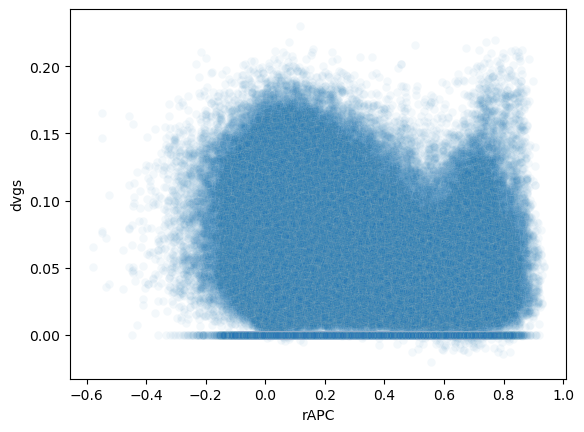

In [7]:
print(rAPC[['dvgs', 'rAPC']].corr('spearman'))

plt.figure()
sbn.scatterplot(x='rAPC', y='dvgs', data=rAPC, alpha=0.05)
plt.show()

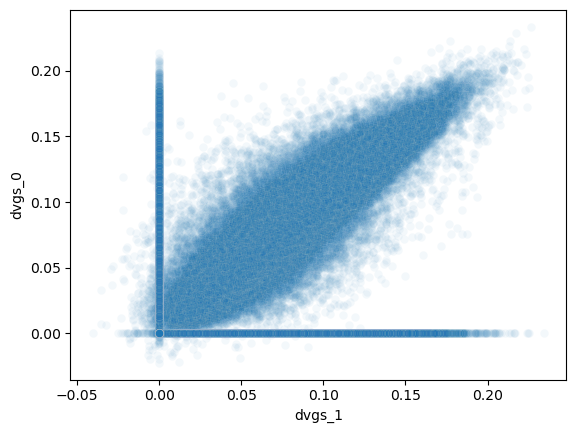

In [33]:
plt.figure()
sbn.scatterplot(x='dvgs_1', y='dvgs_0', data=rAPC, alpha=0.05)
plt.show()

In [138]:
rAPC = pd.read_csv('../data/rAPC.csv').merge(res, on='sample_id', how='right')
rAPC.head()

,sample_id,rAPC,nrepl,L1,L2,dvgs0,dvgs1,dvgs2,dvgs3,dvgs4,dvgs5
0,ABY001_A375_XH_X1_B15:A13,0.324414,9,1.649418,11.675443,0.008822,0.012476,0.015135,0.000547,0.010918,0.041220
1,ABY001_A375_XH_X1_B15:A14,0.189060,11,1.265392,4.093121,-0.003000,0.005400,0.009382,0.005034,0.003165,0.022885
2,ABY001_A375_XH_X1_B15:A15,0.436836,10,2.257690,11.702172,0.006041,0.038272,0.031013,0.005056,0.023975,0.110244
3,ABY001_A375_XH_X1_B15:A16,0.089820,9,0.961196,2.485945,-0.004895,0.003377,0.001476,0.003816,0.007499,0.006956
4,ABY001_A375_XH_X1_B15:A17,0.367309,9,1.855790,9.666554,-0.007849,0.003365,0.036109,0.002321,0.010075,0.106899


In [139]:
rAPC = rAPC.assign(dvgs_mean=lambda x: (x.dvgs0 + x.dvgs1 + x.dvgs2 + x.dvgs3 + x.dvgs4 + x.dvgs5)/6)
rAPC.head()

,sample_id,rAPC,nrepl,L1,L2,dvgs0,dvgs1,dvgs2,dvgs3,dvgs4,dvgs5,dvgs_mean
0,ABY001_A375_XH_X1_B15:A13,0.324414,9,1.649418,11.675443,0.008822,0.012476,0.015135,0.000547,0.010918,0.041220,0.014853
1,ABY001_A375_XH_X1_B15:A14,0.189060,11,1.265392,4.093121,-0.003000,0.005400,0.009382,0.005034,0.003165,0.022885,0.007144
2,ABY001_A375_XH_X1_B15:A15,0.436836,10,2.257690,11.702172,0.006041,0.038272,0.031013,0.005056,0.023975,0.110244,0.035767
3,ABY001_A375_XH_X1_B15:A16,0.089820,9,0.961196,2.485945,-0.004895,0.003377,0.001476,0.003816,0.007499,0.006956,0.003038
4,ABY001_A375_XH_X1_B15:A17,0.367309,9,1.855790,9.666554,-0.007849,0.003365,0.036109,0.002321,0.010075,0.106899,0.025153


In [140]:
rAPC[['rAPC', 'dvgs0', 'dvgs1', 'dvgs2', 'dvgs3', 'dvgs4', 'dvgs5', 'dvgs_mean']].corr('spearman')

,rAPC,dvgs0,dvgs1,dvgs2,dvgs3,dvgs4,dvgs5,dvgs_mean
rAPC,1.000000,0.012818,0.100027,0.270003,0.048445,0.203346,0.270656,0.314763
dvgs0,0.012818,1.000000,0.265014,-0.282394,0.332251,-0.117534,-0.227583,-0.025373
dvgs1,0.100027,0.265014,1.000000,-0.157258,0.458799,-0.340931,-0.162229,0.027518
dvgs2,0.270003,-0.282394,-0.157258,1.000000,-0.096481,0.437855,0.569864,0.685334
dvgs3,0.048445,0.332251,0.458799,-0.096481,1.000000,-0.055443,-0.245005,0.035485
dvgs4,0.203346,-0.117534,-0.340931,0.437855,-0.055443,1.000000,0.346421,0.464926
dvgs5,0.270656,-0.227583,-0.162229,0.569864,-0.245005,0.346421,1.000000,0.871922
dvgs_mean,0.314763,-0.025373,0.027518,0.685334,0.035485,0.464926,0.871922,1.000000


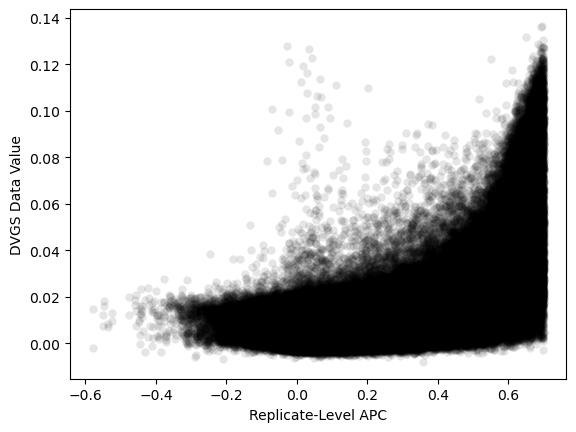

: 

In [141]:
plt.figure()
sbn.scatterplot(x='rAPC', y='dvgs_mean', data=rAPC, alpha=0.1, c='k', linewidth=0)
plt.ylabel('DVGS Data Value', fontsize=10)
plt.xlabel('Replicate-Level APC', fontsize=10)
plt.show()

In [13]:
instinfo = pd.read_csv('../data/instinfo_beta.txt', low_memory=False, sep='\t')
instinfo.head()

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_itime,pert_time_unit,cell_mfc_name,pert_mfc_id,...,sample_id,pert_type,cell_iname,qc_pass,dyn_range,inv_level_10,build_name,failure_mode,project_code,cmap_name
0,b11,NaN,20.00,uL,20 uL,72.0,72 h,h,VCAP,ERG_11,...,ERG013_VCAP_72H_X3_B11:O14,trt_sh,VCAP,0.0,4.20788,4220.5,NaN,dyn_range,ERG,ERG
1,b10,NaN,1.00,uL,1 uL,96.0,96 h,h,U2OS,TRCN0000072237,...,TAK004_U2OS_96H_X2_B10_DUO52HI53LO:D10,ctl_vector,U2OS,0.0,4.73906,1462.0,NaN,inv_level_10,TAK,LACZ
2,b12,NaN,0.10,ng/ml,0.1 ng/ml,2.0,2 h,h,HEPG2,SOD3,...,CYT001_HEPG2_2H_X2_B12:N12,trt_lig,HEPG2,1.0,6.79642,3038.0,NaN,NaN,CYT,SOD3
3,b12,NaN,150.00,ng,150 ng,48.0,48 h,h,HEK293T,ENTRY00543,...,HSF038_HEK293T_48H_X2_B12:M01,trt_oe,HEK293T,0.0,23.79710,1642.0,NaN,inv_level_10,HSF,PDGFRA
4,f3b5,6.66,5.33,uM,6.66 uM,24.0,24 h,h,A375,BRD-K79781870,...,DOS043_A375_24H_X1_F3B5_DUO52HI53LO:D17,trt_cp,A375,0.0,6.78867,1558.0,NaN,"inv_level_10,qc_iqr",DOS,BRD-K79781870


In [14]:
rAPC = rAPC.merge(instinfo[['sample_id', 'qc_pass']], on='sample_id', how='left')
rAPC.head()

,sample_id,rAPC,nrepl,L1,L2,dvgs1,dvgs2,dvgs3,dvgs_mean,qc_pass
0,ABY001_A375_XH_X1_B15:A13,0.312569,12,1.649418,11.675443,-0.002813,-0.003735,0.009422,0.000958,1.0
1,ABY001_A375_XH_X1_B15:A14,0.194377,12,1.265392,4.093121,0.005394,0.000825,-0.000586,0.001878,1.0
2,ABY001_A375_XH_X1_B15:A15,0.440079,11,2.257690,11.702172,0.018240,0.007897,0.033420,0.019852,1.0
3,ABY001_A375_XH_X1_B15:A16,0.089820,9,0.961196,2.485945,-0.000514,0.004199,0.004935,0.002873,1.0
4,ABY001_A375_XH_X1_B15:A17,0.351792,12,1.855790,9.666554,0.001087,0.003180,0.011146,0.005138,1.0


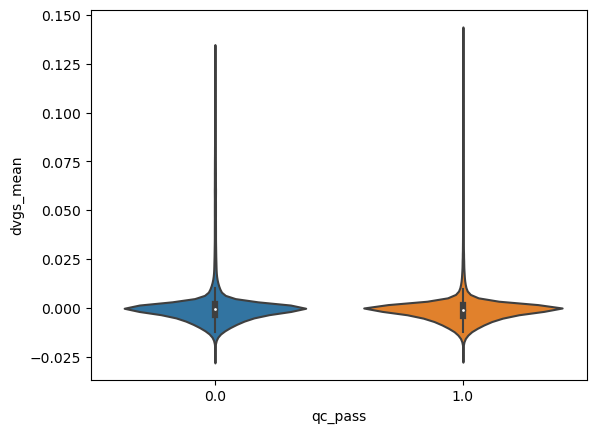

In [15]:
plt.figure()
sbn.violinplot(x='qc_pass', y='dvgs_mean', data=rAPC)
plt.show()

In [31]:
def get_filtered_scores_LINCS(vals, model, crit, metric, train_dataset, test_dataset, qs=np.linspace(0., 0.5, 5), batch_size=256, num_workers=1, lr=1e-3, epochs=200, repl=1):

    remove_low_values = []
    remove_high_values = []
    for i,q in enumerate(qs): 
        print(f'training filtered models... progress: {i}/{len(qs)}', end='\r')
        low_t = np.quantile(vals, q)
        high_t = np.quantile(vals, 1-q)

        remove_low_mask = (vals >= low_t).nonzero()[0] 
        remove_high_mask = (vals <= high_t).nonzero()[0] 

        _train_dataset_low = copy.deepcopy(train_dataset)
        _train_dataset_low.x = _train_dataset_low.x[remove_low_mask,:]
        print()
        
        _low_res = []
        for j in range(repl): 

            _, remove_low_res = train_model(model           = copy.deepcopy(model),
                                            crit            = crit, 
                                            metric          = metric,
                                            train_dataset   = _train_dataset_low, 
                                            test_dataset    = test_dataset, 
                                            batch_size      = batch_size,
                                            num_workers     = num_workers, 
                                            lr              = lr,
                                            epochs          = epochs, verbose = True, use_cuda=True)

            _low_res.append(remove_low_res)

        del _train_dataset_low 

        _train_dataset_high = copy.deepcopy(train_dataset)
        _train_dataset_high.x = _train_dataset_high.x[remove_high_mask,:]

        _high_res = []
        for j in range(repl):

            _, remove_high_res = train_model(model           = copy.deepcopy(model),
                                            crit            = crit, 
                                            metric          = metric,
                                            train_dataset   = _train_dataset_high, 
                                            test_dataset    = test_dataset, 
                                            batch_size      = batch_size,
                                            num_workers     = num_workers, 
                                            lr              = lr,
                                            epochs          = epochs, verbose = True, use_cuda=True)

            _high_res.append(remove_high_res)

        del _train_dataset_high

        remove_low_values.append(np.mean(_low_res))
        remove_high_values.append(np.mean(_high_res))

    return remove_low_values, remove_high_values

In [32]:
x_train = torch.load(f'../data/lincs/l1000_data_TRAIN.pt')
x_test = torch.load(f'../data/lincs/l1000_data_TEST.pt')

train_dataset = AEDataset(x_train)
test_dataset = AEDataset(x_test)

In [33]:
model = AE(in_channels=978, latent_channels=64, hidden_channels=500, norm=False, dropout=0., bias=True, act=torch.nn.Mish, num_layers=1)
crit = torch.nn.MSELoss()
metric = lambda y,yhat: np.mean((y - yhat)**2)

# Evaluation hyperparameters
qs = np.linspace(0., 0.9, 10)
bs = 1000
nw = 10 
lr = 1e-3 
ep = 10
rp = 1

dvgs_low, dvgs_high = get_filtered_scores_LINCS(vals                = rAPC.dvgs_mean.values, 
                                                model               = copy.deepcopy(model), 
                                                crit                = crit, 
                                                metric              = metric, 
                                                train_dataset       = train_dataset, 
                                                test_dataset        = test_dataset, 
                                                qs                  = qs, 
                                                batch_size          = bs, 
                                                num_workers         = nw,
                                                lr                  = lr,
                                                epochs              = ep,
                                                repl                = rp)

rapc_low, rapc_high = get_filtered_scores_LINCS(vals                = rAPC.rAPC.fillna(rAPC.rAPC.median()).values, 
                                                model               = copy.deepcopy(model), 
                                                crit                = crit, 
                                                metric              = metric, 
                                                train_dataset       = train_dataset, 
                                                test_dataset        = test_dataset, 
                                                qs                  = qs, 
                                                batch_size          = bs, 
                                                num_workers         = nw,
                                                lr                  = lr,
                                                epochs              = ep,
                                                repl                = rp)

training filtered models... progress: 0/10
training filtered models... progress: 1/10
training filtered models... progress: 2/10
training filtered models... progress: 3/10
training filtered models... progress: 4/10
training filtered models... progress: 5/10
training filtered models... progress: 6/10
training filtered models... progress: 7/10
training filtered models... progress: 8/10
training filtered models... progress: 9/10
training filtered models... progress: 0/10
training filtered models... progress: 1/10
training filtered models... progress: 2/10
training filtered models... progress: 3/10
training filtered models... progress: 4/10
training filtered models... progress: 5/10
training filtered models... progress: 6/10
training filtered models... progress: 7/10
training filtered models... progress: 8/10
training filtered models... progress: 9/10


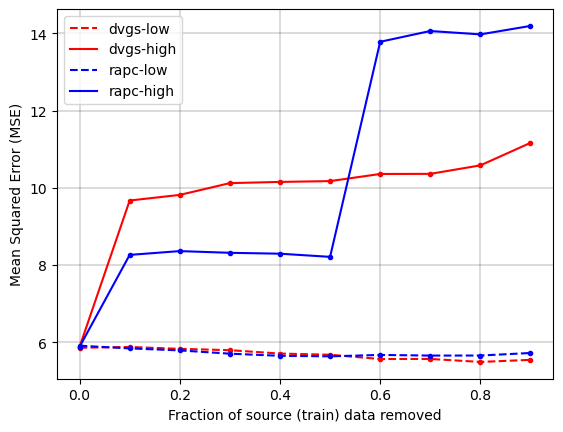

In [34]:
plt.figure() 

plt.plot(qs, np.array(dvgs_low), 'r--', label='dvgs-low')
plt.plot(qs, np.array(dvgs_low), 'r.')
plt.plot(qs, np.array(dvgs_high), 'r-', label='dvgs-high')
plt.plot(qs, np.array(dvgs_high), 'r.')

plt.plot(qs, np.array(rapc_low), 'b--', label='rapc-low')
plt.plot(qs, np.array(rapc_low), 'b.')
plt.plot(qs, np.array(rapc_high), 'b-', label='rapc-high')
plt.plot(qs, np.array(rapc_high), 'b.')

plt.legend()
plt.xlabel('Fraction of source (train) data removed')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(color='k', linestyle='-', linewidth=0.2,)
plt.show()